In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paris-2024-olympic-summer-games/nocs.csv
/kaggle/input/paris-2024-olympic-summer-games/coaches.csv
/kaggle/input/paris-2024-olympic-summer-games/medallists.csv
/kaggle/input/paris-2024-olympic-summer-games/technical_officials.csv
/kaggle/input/paris-2024-olympic-summer-games/teams.csv
/kaggle/input/paris-2024-olympic-summer-games/torch_route.csv
/kaggle/input/paris-2024-olympic-summer-games/schedules.csv
/kaggle/input/paris-2024-olympic-summer-games/athletes.csv
/kaggle/input/paris-2024-olympic-summer-games/venues.csv
/kaggle/input/paris-2024-olympic-summer-games/schedules_preliminary.csv
/kaggle/input/paris-2024-olympic-summer-games/medals_total.csv
/kaggle/input/paris-2024-olympic-summer-games/events.csv
/kaggle/input/paris-2024-olympic-summer-games/medals.csv
/kaggle/input/paris-2024-olympic-summer-games/results/Rowing.csv
/kaggle/input/paris-2024-olympic-summer-games/results/Table Tennis.csv
/kaggle/input/paris-2024-olympic-summer-games/results/Water Polo.csv
/kaggle/

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
coaches = pd.read_csv('/kaggle/input/paris-2024-olympic-summer-games/coaches.csv')
medals = pd.read_csv('/kaggle/input/paris-2024-olympic-summer-games/medals.csv')
venues = pd.read_csv('/kaggle/input/paris-2024-olympic-summer-games/venues.csv')

In [4]:
coaches.head()

,code,current,name,gender,function,category,country_code,country,country_long,disciplines,events,birth_date
0,1533246,True,PEDRERO Ofelia,Female,Coach,C,MEX,Mexico,Mexico,Artistic Swimming,Team,1988-03-28
1,1535775,True,RADHI SHENAISHIL,Male,Head Coach,C,IRQ,Iraq,Iraq,Football,Men,1965-07-01
2,1536055,True,AFLAKIKHAMSEH Majid,Male,Coach,C,IRI,IR Iran,Islamic Republic of Iran,Taekwondo,NaN,1973-08-26
3,1536059,True,YOUSEFY Mehrdad,Male,Coach,C,IRI,IR Iran,Islamic Republic of Iran,Taekwondo,NaN,1972-06-12
4,1536060,True,MADDAH Minoo,Female,Coach,C,IRI,IR Iran,Islamic Republic of Iran,Taekwondo,NaN,1976-05-17


In [5]:
medals.isnull().sum()

medal_type      0
medal_code      1
medal_date      0
name            0
gender          0
discipline      0
event           0
event_type      0
url_event       9
code            0
country_code    0
country         0
country_long    0
dtype: int64

In [6]:
coaches.isnull().sum()

code              0
current           0
name              0
gender            0
function          0
category          0
country_code      0
country           0
country_long      0
disciplines       0
events          556
birth_date       38
dtype: int64

In [7]:
coaches.info()
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   code          974 non-null    int64 
 1   current       974 non-null    bool  
 2   name          974 non-null    object
 3   gender        974 non-null    object
 4   function      974 non-null    object
 5   category      974 non-null    object
 6   country_code  974 non-null    object
 7   country       974 non-null    object
 8   country_long  974 non-null    object
 9   disciplines   974 non-null    object
 10  events        418 non-null    object
 11  birth_date    936 non-null    object
dtypes: bool(1), int64(1), object(10)
memory usage: 84.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   medal_type    1044 non-null   object 
 1   medal

In [8]:
# Convert birth_date to datetime
coaches['birth_date'] = pd.to_datetime(coaches['birth_date'], errors='coerce')
medals['medal_date'] = pd.to_datetime(medals['medal_date'], errors='coerce')

In [9]:
# Merging the dataset on columns: discipline and country_code
coaches_medals = pd.merge(
    coaches,
    medals,
    left_on=['disciplines', 'country_code'],
    right_on=['discipline', 'country_code'],
    how='inner'
)

coaches_medals.head()

,code_x,current,name_x,gender_x,function,category,country_code,country_x,country_long_x,disciplines,...,medal_date,name_y,gender_y,discipline,event,event_type,url_event,code_y,country_y,country_long_y
0,1536055,True,AFLAKIKHAMSEH Majid,Male,Coach,C,IRI,IR Iran,Islamic Republic of Iran,Taekwondo,...,2024-08-07,Mobina NEMATZADEH,W,Taekwondo,Women -49kg,HATH,/en/paris-2024/results/taekwondo/women--49kg/r...,1536064,IR Iran,Islamic Republic of Iran
1,1536055,True,AFLAKIKHAMSEH Majid,Male,Coach,C,IRI,IR Iran,Islamic Republic of Iran,Taekwondo,...,2024-08-08,Nahid KIYANICHANDEH,W,Taekwondo,Women -57kg,HATH,/en/paris-2024/results/taekwondo/women--57kg/f...,1536067,IR Iran,Islamic Republic of Iran
2,1536055,True,AFLAKIKHAMSEH Majid,Male,Coach,C,IRI,IR Iran,Islamic Republic of Iran,Taekwondo,...,2024-08-09,Mehran BARKHORDARI,M,Taekwondo,Men -80kg,HATH,/en/paris-2024/results/taekwondo/men--80kg/fnl...,1536058,IR Iran,Islamic Republic of Iran
3,1536055,True,AFLAKIKHAMSEH Majid,Male,Coach,C,IRI,IR Iran,Islamic Republic of Iran,Taekwondo,...,2024-08-10,Arian SALIMI,M,Taekwondo,Men +80kg,HATH,/en/paris-2024/results/taekwondo/men--plus-80k...,1536045,IR Iran,Islamic Republic of Iran
4,1536059,True,YOUSEFY Mehrdad,Male,Coach,C,IRI,IR Iran,Islamic Republic of Iran,Taekwondo,...,2024-08-07,Mobina NEMATZADEH,W,Taekwondo,Women -49kg,HATH,/en/paris-2024/results/taekwondo/women--49kg/r...,1536064,IR Iran,Islamic Republic of Iran


In [10]:
coaches_medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   code_x          728 non-null    int64         
 1   current         728 non-null    bool          
 2   name_x          728 non-null    object        
 3   gender_x        728 non-null    object        
 4   function        728 non-null    object        
 5   category        728 non-null    object        
 6   country_code    728 non-null    object        
 7   country_x       728 non-null    object        
 8   country_long_x  728 non-null    object        
 9   disciplines     728 non-null    object        
 10  events          202 non-null    object        
 11  birth_date      708 non-null    datetime64[ns]
 12  medal_type      728 non-null    object        
 13  medal_code      728 non-null    float64       
 14  medal_date      728 non-null    datetime64[ns]
 15  name_y

In [11]:
columns_to_drop = [
    'code_x', 'current', 'country_x', 'country_long_x', 'events', 
    'medal_date', 'code_y', 'country_y', 'country_long_y', 'event',
    'event_type', 'url_event', 'discipline'
]
coaches_medals_clean = coaches_medals.drop(columns=columns_to_drop)

In [12]:
coaches_medals_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name_x        728 non-null    object        
 1   gender_x      728 non-null    object        
 2   function      728 non-null    object        
 3   category      728 non-null    object        
 4   country_code  728 non-null    object        
 5   disciplines   728 non-null    object        
 6   birth_date    708 non-null    datetime64[ns]
 7   medal_type    728 non-null    object        
 8   medal_code    728 non-null    float64       
 9   name_y        728 non-null    object        
 10  gender_y      728 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 62.7+ KB


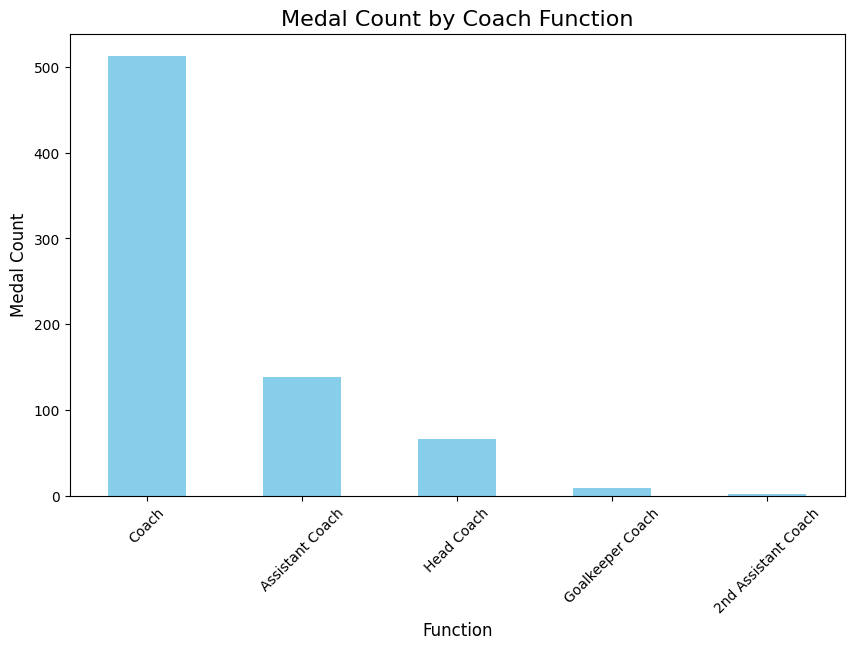

In [13]:
# Medal Count by Coach Function
medals_by_function = coaches_medals_clean.groupby('function')['medal_code'].count().sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
medals_by_function.plot(kind='bar', color='skyblue')
plt.title('Medal Count by Coach Function', fontsize=16)
plt.xlabel('Function', fontsize=12)
plt.ylabel('Medal Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

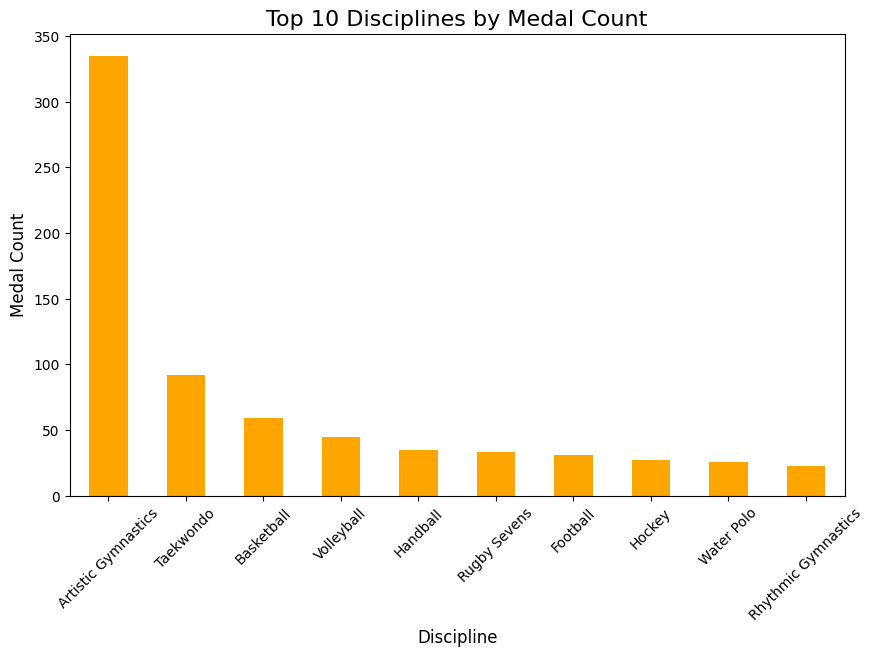

In [14]:
# Medal Distribution by Discipline
discipline_medal_count = coaches_medals_clean.groupby('disciplines')['medal_code'].count().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
discipline_medal_count.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Disciplines by Medal Count', fontsize=16)
plt.xlabel('Discipline', fontsize=12)
plt.ylabel('Medal Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

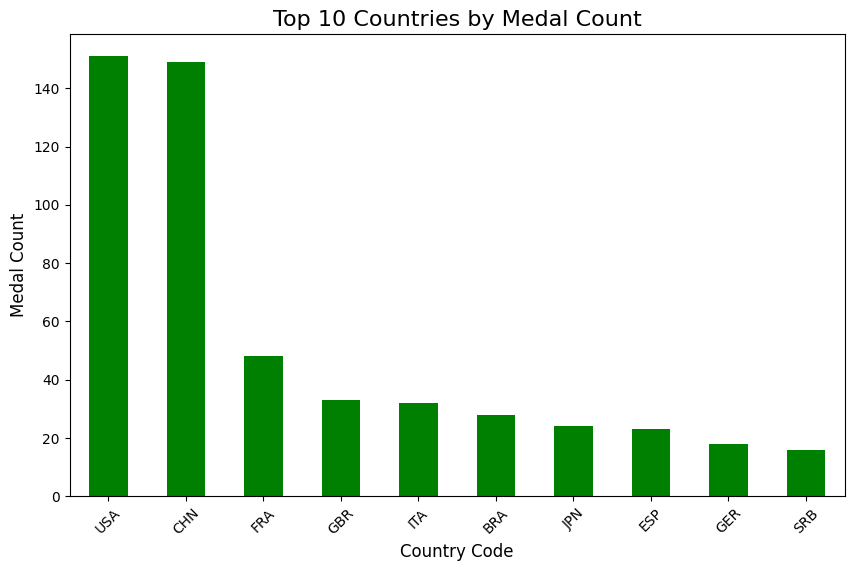

In [15]:
# Medal Count by Country
medals_by_country = coaches_medals_clean.groupby('country_code')['medal_code'].count().sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
medals_by_country.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Countries by Medal Count', fontsize=16)
plt.xlabel('Country Code', fontsize=12)
plt.ylabel('Medal Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

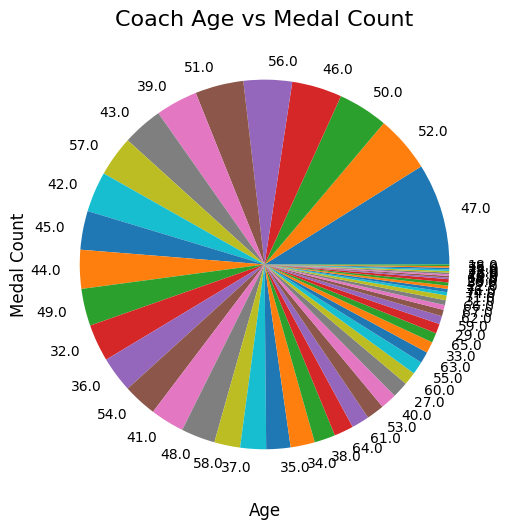

In [16]:
# Age and Medal Performance

# Calculating Age, adding a age column
coaches_medals_clean['age'] = 2024 - pd.to_datetime(
    coaches_medals_clean['birth_date'], errors='coerce'
).dt.year

# Medal count by Age
age_medal_count = coaches_medals_clean.groupby('age')['medal_code'].count().sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
age_medal_count.plot(kind='pie', color='purple')
plt.title('Coach Age vs Medal Count', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Medal Count', fontsize=12)
plt.grid(True)
plt.show()

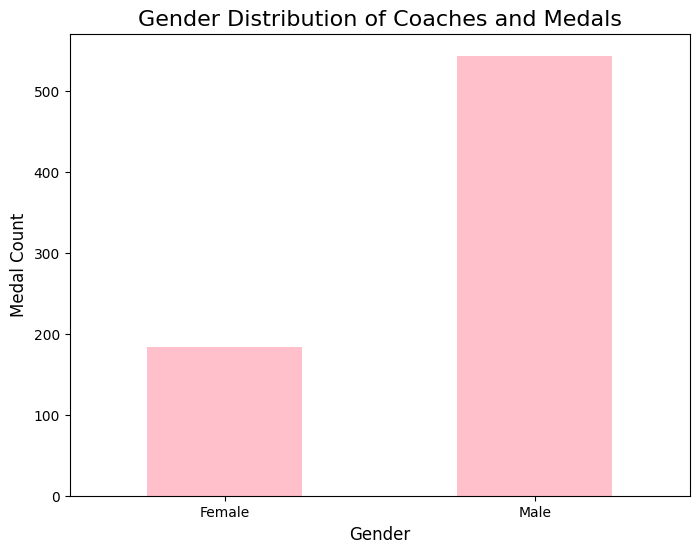

In [17]:
# Gender Distribution of Coaches and Medals
gender_medal_count = coaches_medals_clean.groupby('gender_x')['medal_code'].count()

# Visualsation
plt.figure(figsize=(8, 6))
gender_medal_count.plot(kind='bar', color='pink')
plt.title('Gender Distribution of Coaches and Medals', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Medal Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

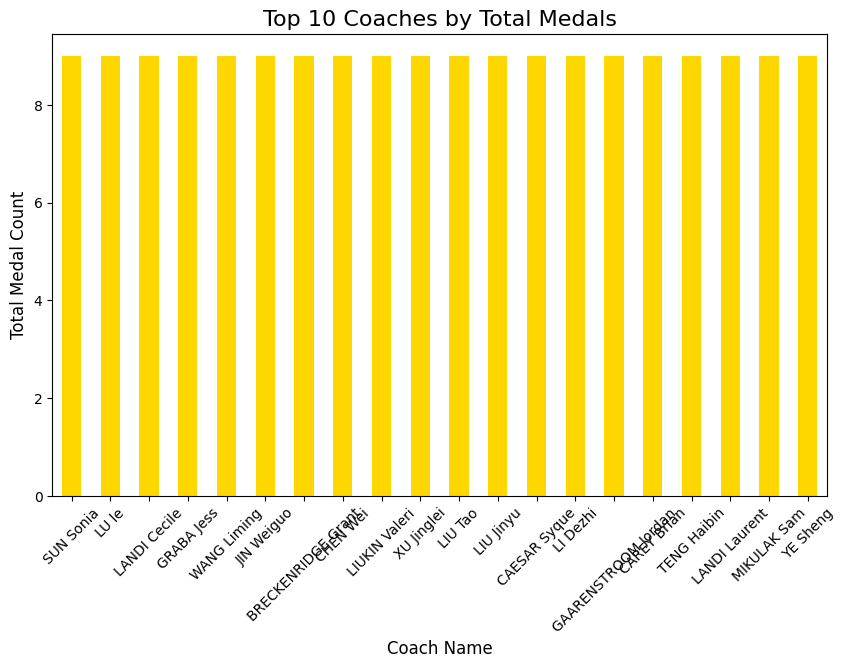

In [18]:
# Top 10 Coaches by Total Medals
top_coaches = (
    coaches_medals_clean.groupby('name_x')['medal_code'].count().sort_values(ascending=False).head(20)
)


# Plot
top_coaches.plot(kind='bar', figsize=(10, 6), color='gold')
plt.title('Top 10 Coaches by Total Medals', fontsize=16)
plt.xlabel('Coach Name', fontsize=12)
plt.ylabel('Total Medal Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

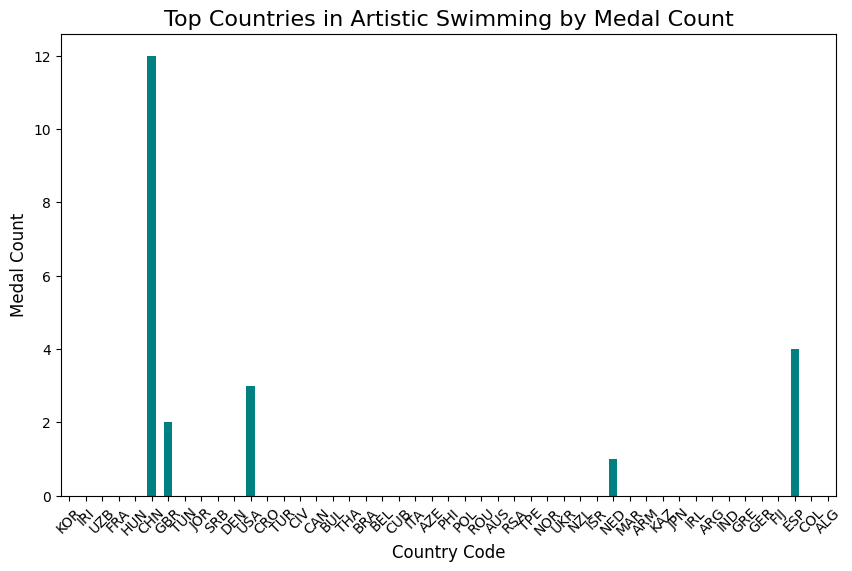

In [19]:
# Country Representation by Discipline

# Top Countries by Discipline
discipline_country_medals = (
    coaches_medals_clean.groupby(['disciplines', 'country_code'])['medal_code']
    .count()
    .unstack()
    .fillna(0)
    .sort_values(by=coaches_medals_clean['disciplines'].iloc[0], axis=1, ascending=False)
    .head(10)
)

# Visualization (for a specific discipline, e.g., Artistic Swimming)
discipline_country_medals.loc['Artistic Swimming'].plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Top Countries in Artistic Swimming by Medal Count', fontsize=16)
plt.xlabel('Country Code', fontsize=12)
plt.ylabel('Medal Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [20]:
venues = pd.read_csv('/kaggle/input/paris-2024-olympic-summer-games/venues.csv')

In [21]:
venues.head()

,venue,sports,date_start,date_end,tag,url
0,Aquatics Centre,"['Artistic Swimming', 'Diving', 'Water Polo']",2024-07-27T09:00:00Z,2024-08-10T20:00:00Z,aquatics-centre,https://olympics.com/en/paris-2024/venues/aqua...
1,Bercy Arena,"['Artistic Gymnastics', 'Basketball', 'Trampol...",2024-07-27T09:00:00Z,2024-08-11T16:00:00Z,bercy-arena,https://olympics.com/en/paris-2024/venues/berc...
2,Bordeaux Stadium,['Football'],2024-07-25T17:00:00Z,2024-08-02T21:59:00Z,bordeaux-stadium,https://olympics.com/en/paris-2024/venues/bord...
3,Champ de Mars Arena,"['Judo', 'Wrestling']",2024-07-27T08:00:00Z,2024-08-11T12:00:00Z,champ-de-mars-arena,https://olympics.com/en/paris-2024/venues/cham...
4,Château de Versailles,"['Equestrian', 'Modern Pentathlon']",2024-07-27T07:30:00Z,2024-08-11T11:30:00Z,chateau-de-versailles,https://olympics.com/en/paris-2024/venues/chat...


In [22]:
venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   venue       35 non-null     object
 1   sports      35 non-null     object
 2   date_start  34 non-null     object
 3   date_end    34 non-null     object
 4   tag         35 non-null     object
 5   url         35 non-null     object
dtypes: object(6)
memory usage: 1.8+ KB


In [23]:
venues.isnull().sum()

venue         0
sports        0
date_start    1
date_end      1
tag           0
url           0
dtype: int64

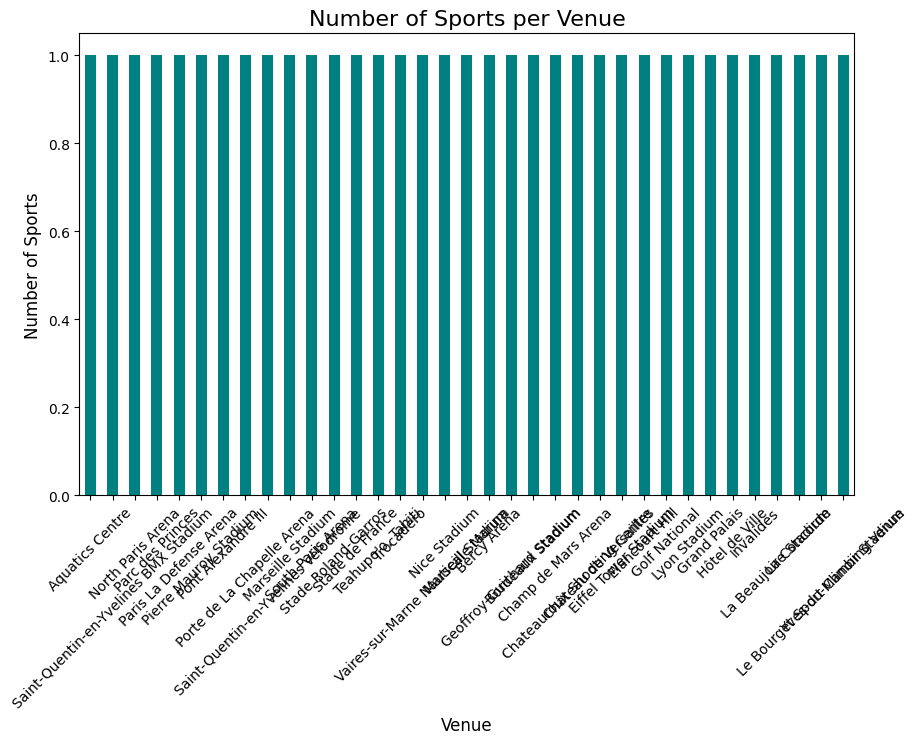

In [24]:
# Number of Sports per Venue
sports_per_venue = venues.groupby('venue')['sports'].count().sort_values(ascending=False)

# Visualisation
sports_per_venue.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Number of Sports per Venue', fontsize=16)
plt.xlabel('Venue', fontsize=12)
plt.ylabel('Number of Sports', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

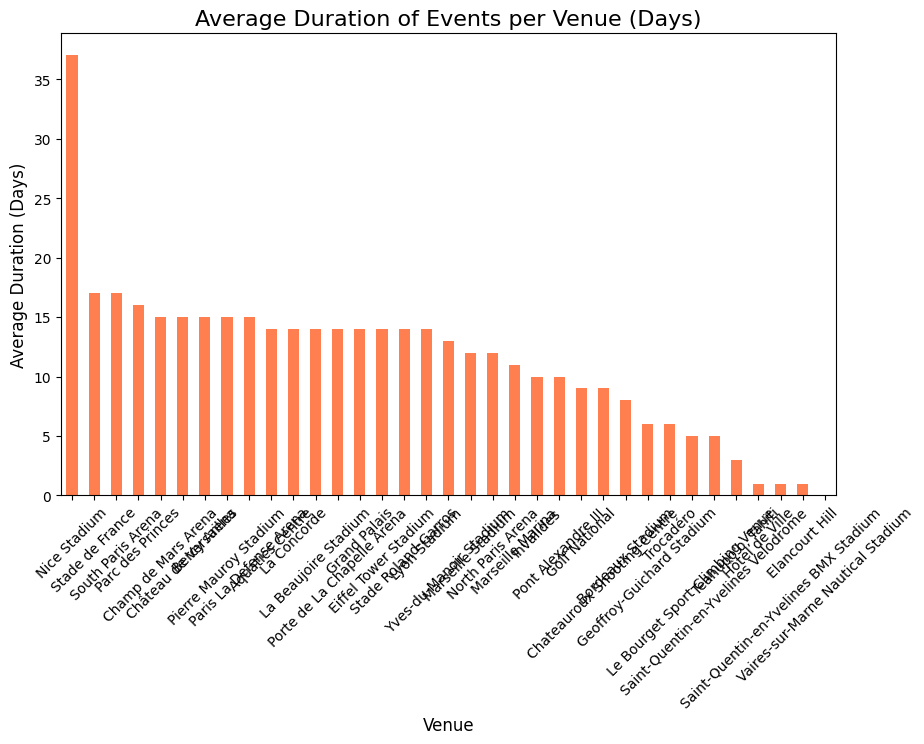

In [25]:
# Duration of Events at Each Venue

# Converting Dates to Datetime
venues['date_start'] = pd.to_datetime(venues['date_start'], errors='coerce')
venues['date_end'] = pd.to_datetime(venues['date_end'], errors='coerce')

# Calculate Duration of Events
venues['event_duration'] = (venues['date_end'] - venues['date_start']).dt.days

# Average Duration per Venue
avg_duration_per_venue = venues.groupby('venue')['event_duration'].mean().sort_values(ascending=False)

# Plot
avg_duration_per_venue.plot(kind='bar', figsize=(10, 6), color='coral')
plt.title('Average Duration of Events per Venue (Days)', fontsize=16)
plt.xlabel('Venue', fontsize=12)
plt.ylabel('Average Duration (Days)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [26]:
# Venue with Longest Event Duration
longest_event = venues.loc[venues['event_duration'].idxmax()]
print("Venue with the Longest Event:")
print(longest_event[['venue', 'sports', 'event_duration']])

Venue with the Longest Event:
venue             Nice Stadium
sports            ['Football']
event_duration            37.0
Name: 19, dtype: object


In [27]:
# Venue with Shortest Event Duration
longest_event = venues.loc[venues['event_duration'].idxmin()]
print("Venue with the Shortest Event:")
print(longest_event[['venue', 'sports', 'event_duration']])

Venue with the Shortest Event:
venue                        Elancourt Hill
sports            ['Cycling Mountain Bike']
event_duration                          1.0
Name: 7, dtype: object


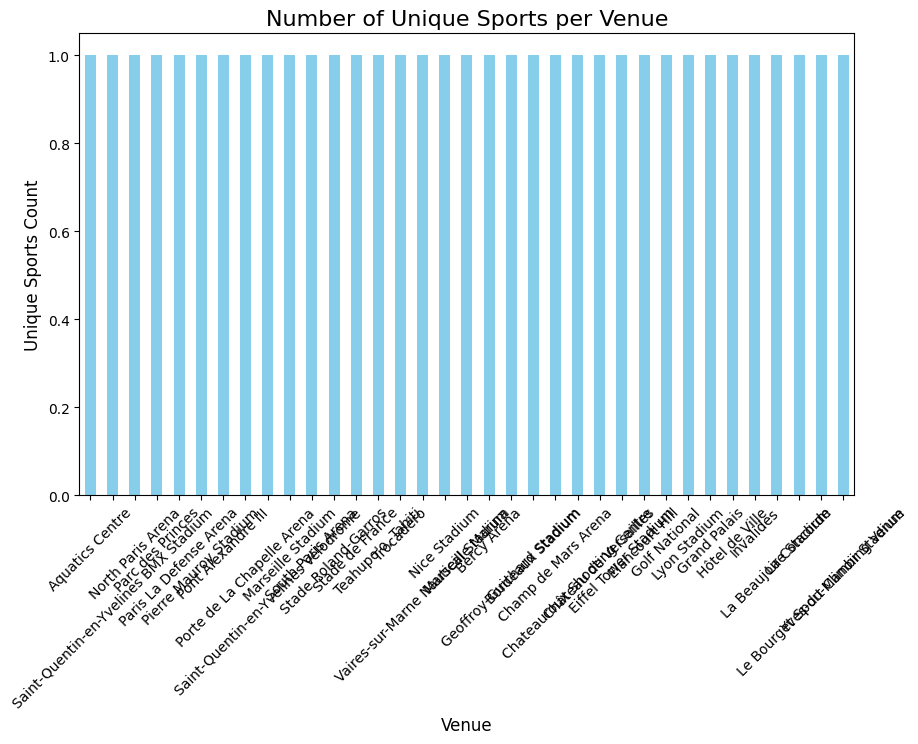

In [28]:
# Count of Unique Sports per Venue
unique_sports_per_venue = venues.groupby('venue')['sports'].nunique().sort_values(ascending=False)

# Plot
unique_sports_per_venue.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Unique Sports per Venue', fontsize=16)
plt.xlabel('Venue', fontsize=12)
plt.ylabel('Unique Sports Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [29]:
# Sports Distribution per Venue
fig = px.scatter(venues,x='venue',y='sports')
fig.show(renderer='iframe')

In [30]:
# Event Duration
venues['duration']=(pd.to_datetime(venues['date_end'])-pd.to_datetime(venues['date_start']))
venues.head()

# Duration vs Venue
fig = px.scatter(venues,x='duration',y='venue')
fig.show(renderer='iframe')